##Setup & Dataset Preparation

Import Required Libraries

In [1]:
# Core Libraries
import numpy as np
import pandas as pd

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn Utilities
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Make plots look better
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,5)


Load the Dataset

In [2]:
# Load dataset (semicolon separated)
df = pd.read_csv("winequality-red.csv", sep=';')

# Display first 5 rows
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Basic Dataset Information

In [3]:
# Check dataset shape
print("Dataset Shape:", df.shape)

# Check column names
print("\nColumn Names:")
print(df.columns)

# Data types and non-null counts
df.info()

# Statistical summary
df.describe()


Dataset Shape: (1599, 12)

Column Names:
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol  

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Clean Column Names

In [4]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

df.head()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Convert Target into Classification Problem

In [5]:
# Convert quality into binary classification
df['quality'] = df['quality'].apply(lambda x: 1 if x >= 6 else 0)

# Check distribution
df['quality'].value_counts()


,count
quality,
1,855
0,744


Check Missing Values & Duplicates

In [6]:
# Missing values
print("Missing Values:\n", df.isnull().sum())

# Duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())


Missing Values:
 fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
ph                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Number of duplicate rows: 240


##Exploratory Data Analysis

Dataset Structure exploration

In [7]:
# Display first 5 rows
df.head()

# Dataset shape
print("Shape of dataset:", df.shape)

# Data types & non-null values
df.info()

# Statistical summary
df.describe()


Shape of dataset: (1599, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   ph                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.534709
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.498950
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


Missing Value Analysis

In [8]:
print("Missing values per column:\n")
print(df.isnull().sum())


Missing values per column:

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
ph                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


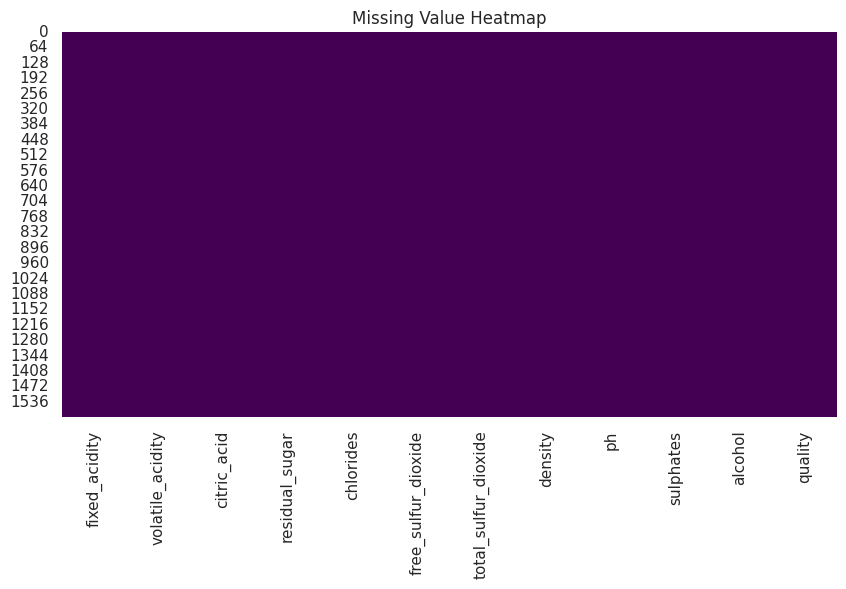

In [9]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Value Heatmap")
plt.show()


Target Variable Distribution

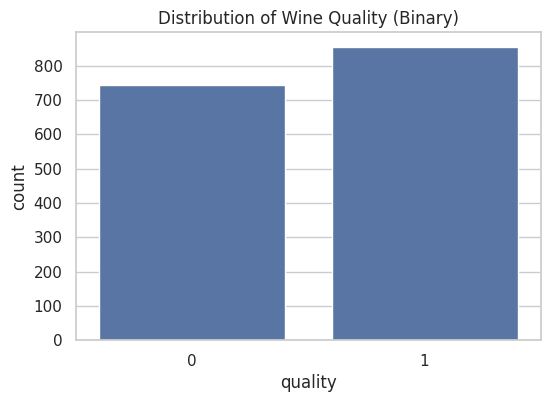

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x='quality', data=df)
plt.title("Distribution of Wine Quality (Binary)")
plt.show()


Feature Distribution

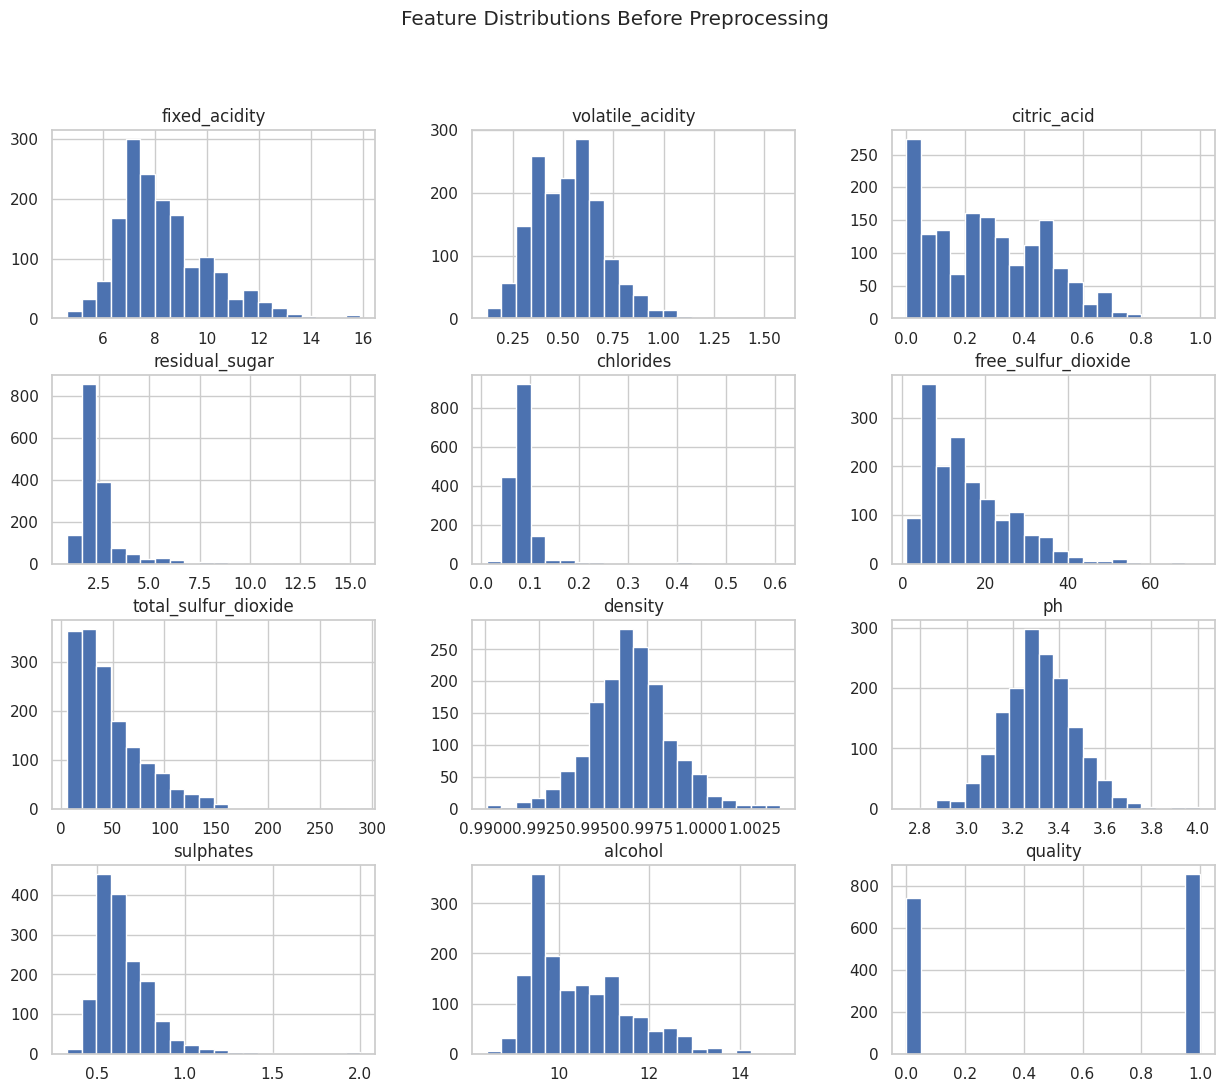

In [11]:
df.hist(bins=20, figsize=(15,12))
plt.suptitle("Feature Distributions Before Preprocessing")
plt.show()


Correlation Analysis

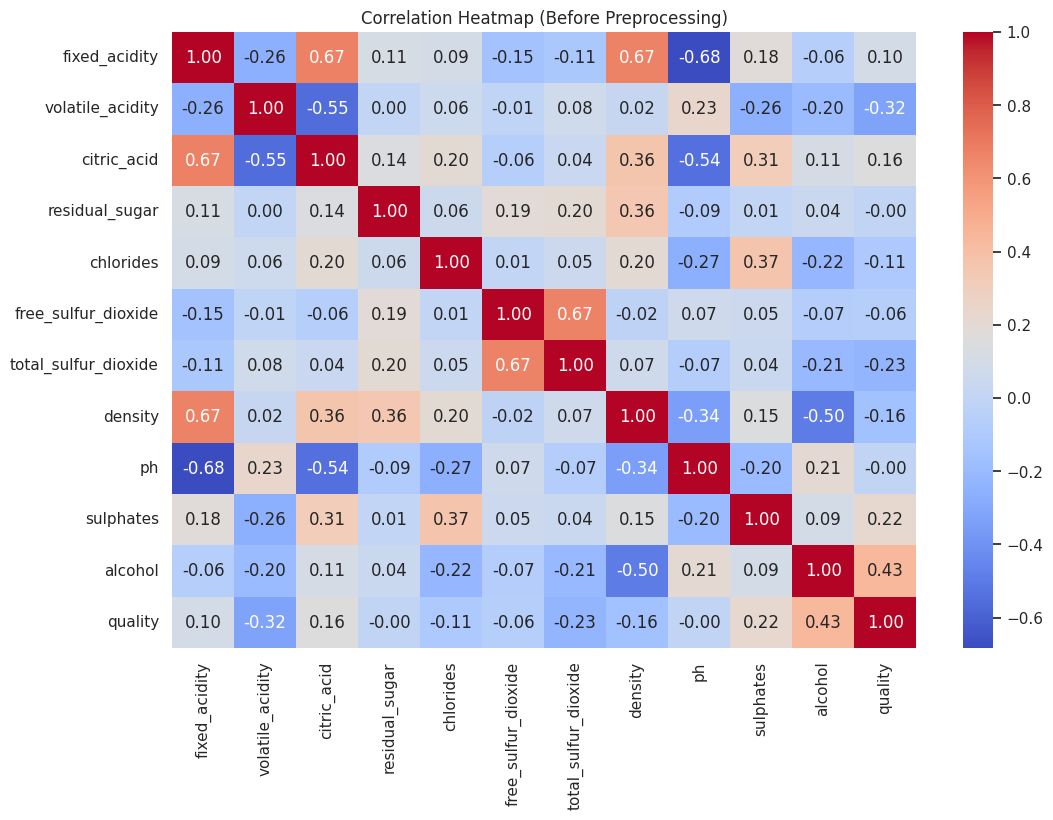

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Before Preprocessing)")
plt.show()


Outlier Detection

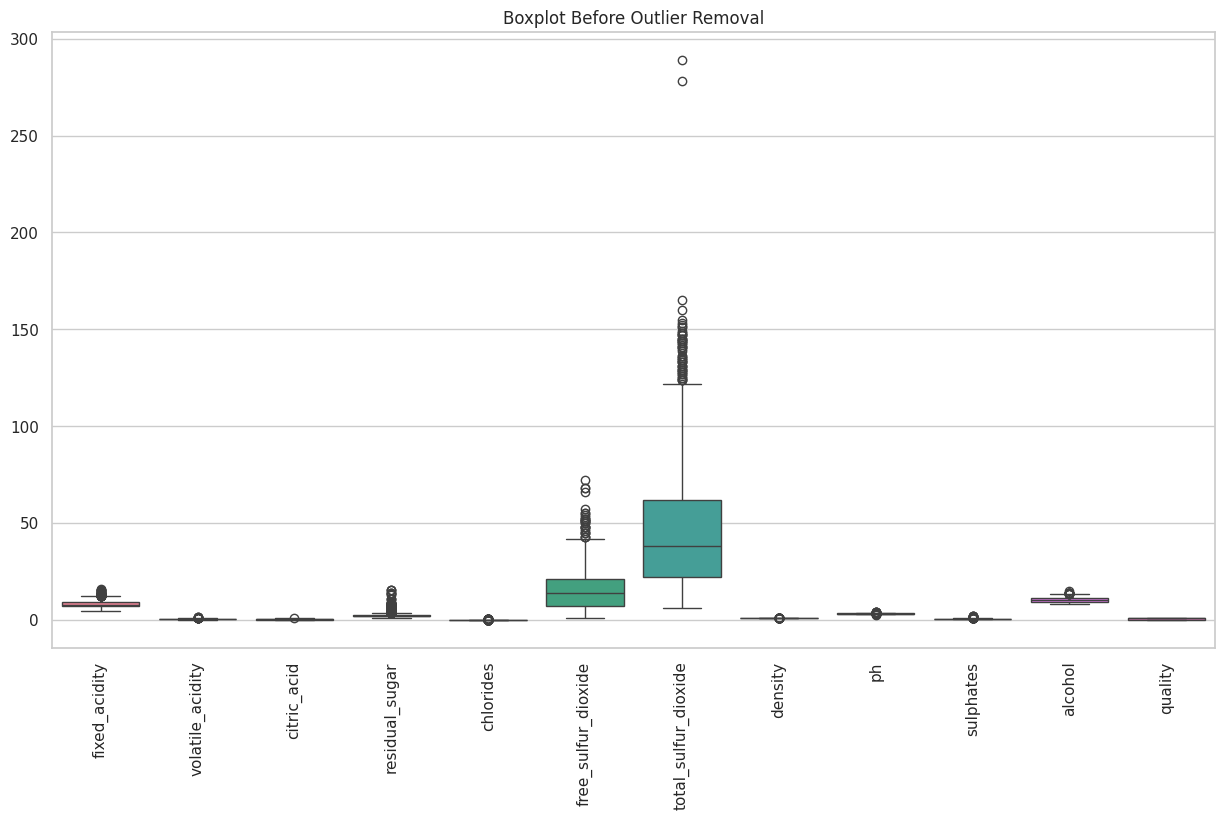

In [13]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot Before Outlier Removal")
plt.show()


**Exploratory Data Analysis Summary**

The dataset contains 1599 samples and 12 features.

All features are numerical.

No missing values were detected.

Some features show skewed distributions.

Correlation analysis shows alcohol positively correlated with quality.

Boxplots indicate presence of outliers in multiple features.


##Data Cleaning

Check & Remove Duplicates

In [14]:
print("Number of duplicate rows before cleaning:", df.duplicated().sum())


Number of duplicate rows before cleaning: 240


In [15]:
df_clean = df.drop_duplicates()

print("Number of duplicate rows after cleaning:", df_clean.duplicated().sum())
print("Shape after duplicate removal:", df_clean.shape)


Number of duplicate rows after cleaning: 0
Shape after duplicate removal: (1359, 12)


Outlier Detection using IQR Method

In [16]:
Q1 = df_clean.quantile(0.25)
Q3 = df_clean.quantile(0.75)
IQR = Q3 - Q1

# Define outlier condition
outlier_condition = ((df_clean < (Q1 - 1.5 * IQR)) |
                     (df_clean > (Q3 + 1.5 * IQR)))

# Remove rows containing outliers
df_no_outliers = df_clean[~outlier_condition.any(axis=1)]

print("Shape before outlier removal:", df_clean.shape)
print("Shape after outlier removal:", df_no_outliers.shape)


Shape before outlier removal: (1359, 12)
Shape after outlier removal: (1019, 12)


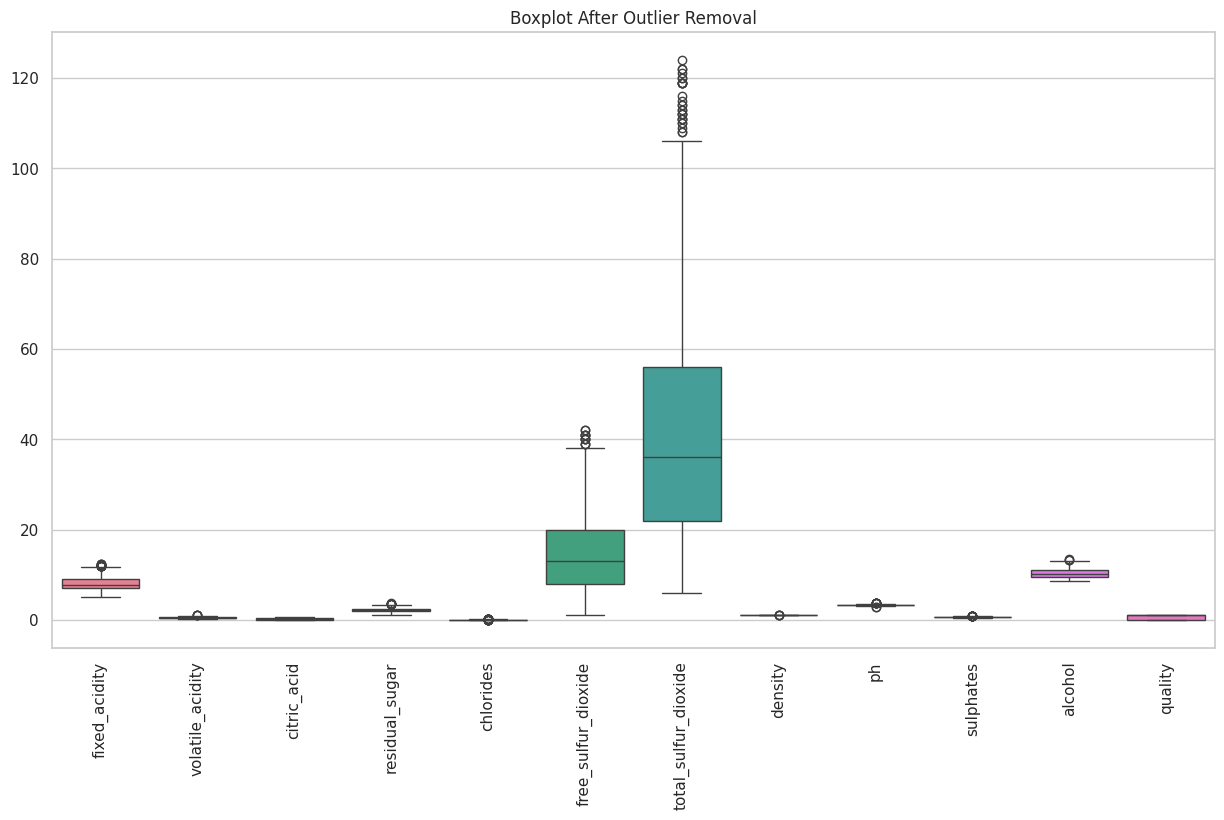

In [17]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df_no_outliers)
plt.xticks(rotation=90)
plt.title("Boxplot After Outlier Removal")
plt.show()


Missing Value Heatmap After Cleaning

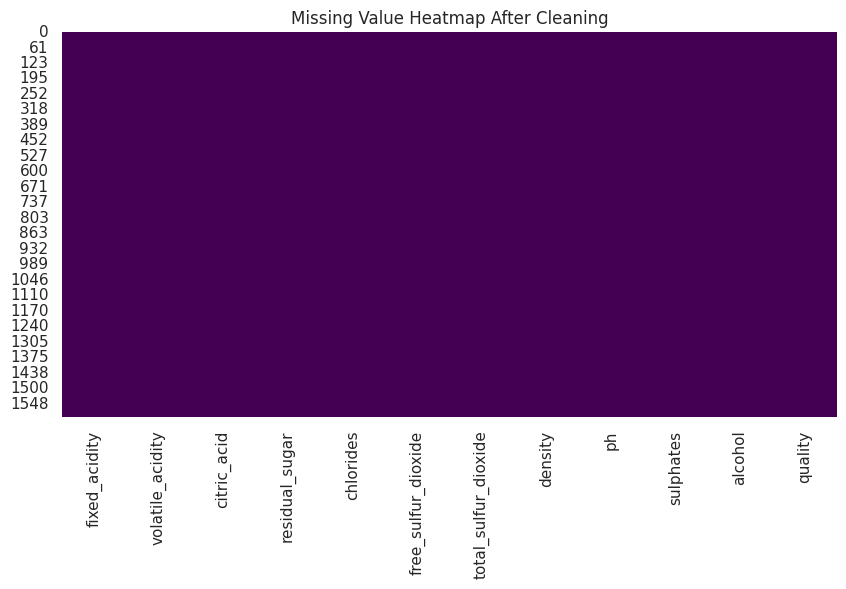

In [18]:
plt.figure(figsize=(10,5))
sns.heatmap(df_no_outliers.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Value Heatmap After Cleaning")
plt.show()


Data Summary Comparison (Before vs After)

In [19]:
print("Summary Before Cleaning:\n")
print(df.describe())

print("\nSummary After Cleaning:\n")
print(df_no_outliers.describe())


Summary Before Cleaning:

       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000    

##Data Transformation

Separate Features and Target

In [20]:
X = df_no_outliers.drop("quality", axis=1)
y = df_no_outliers["quality"]

Train-Test Split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (815, 11)
Testing set shape: (204, 11)


Z-Score Normalization (StandardScaler)

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_z = scaler.fit_transform(X_train)
X_test_z = scaler.transform(X_test)

# Convert back to DataFrame for visualization
X_train_z = pd.DataFrame(X_train_z, columns=X.columns)
X_test_z = pd.DataFrame(X_test_z, columns=X.columns)


Min-Max Normalization

In [23]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()

X_train_mm = minmax.fit_transform(X_train)
X_test_mm = minmax.transform(X_test)

X_train_mm = pd.DataFrame(X_train_mm, columns=X.columns)
X_test_mm = pd.DataFrame(X_test_mm, columns=X.columns)


Histogram Before & After Scaling

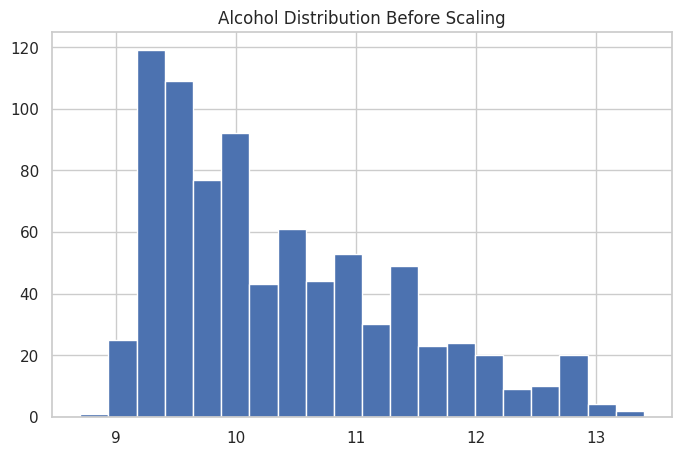

In [24]:
plt.hist(X_train["alcohol"], bins=20)
plt.title("Alcohol Distribution Before Scaling")
plt.show()


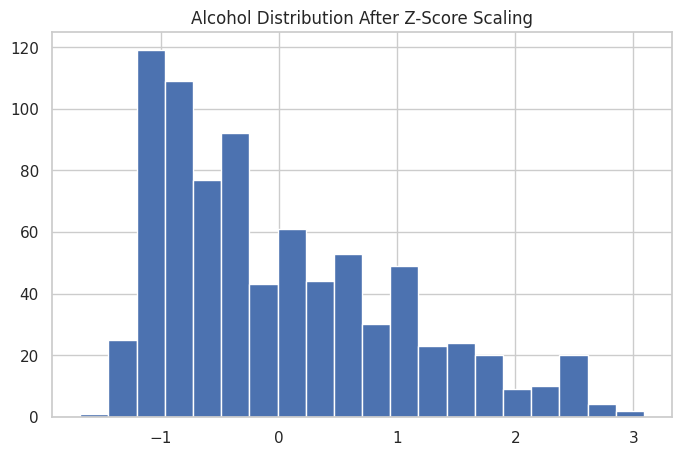

In [25]:
plt.hist(X_train_z["alcohol"], bins=20)
plt.title("Alcohol Distribution After Z-Score Scaling")
plt.show()


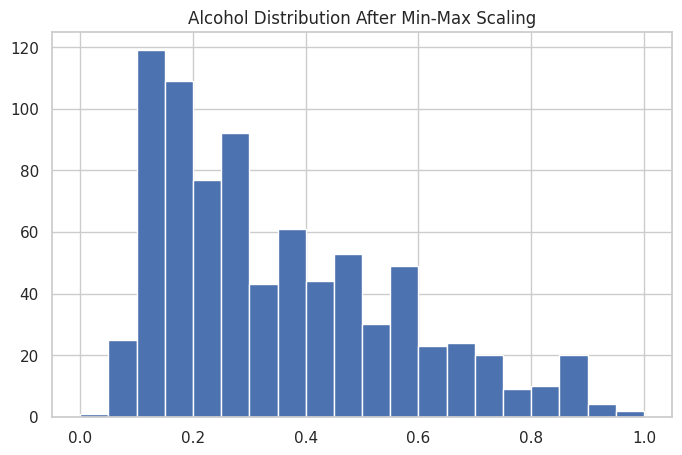

In [26]:
plt.hist(X_train_mm["alcohol"], bins=20)
plt.title("Alcohol Distribution After Min-Max Scaling")
plt.show()


Correlation Heatmap Before vs After Scaling

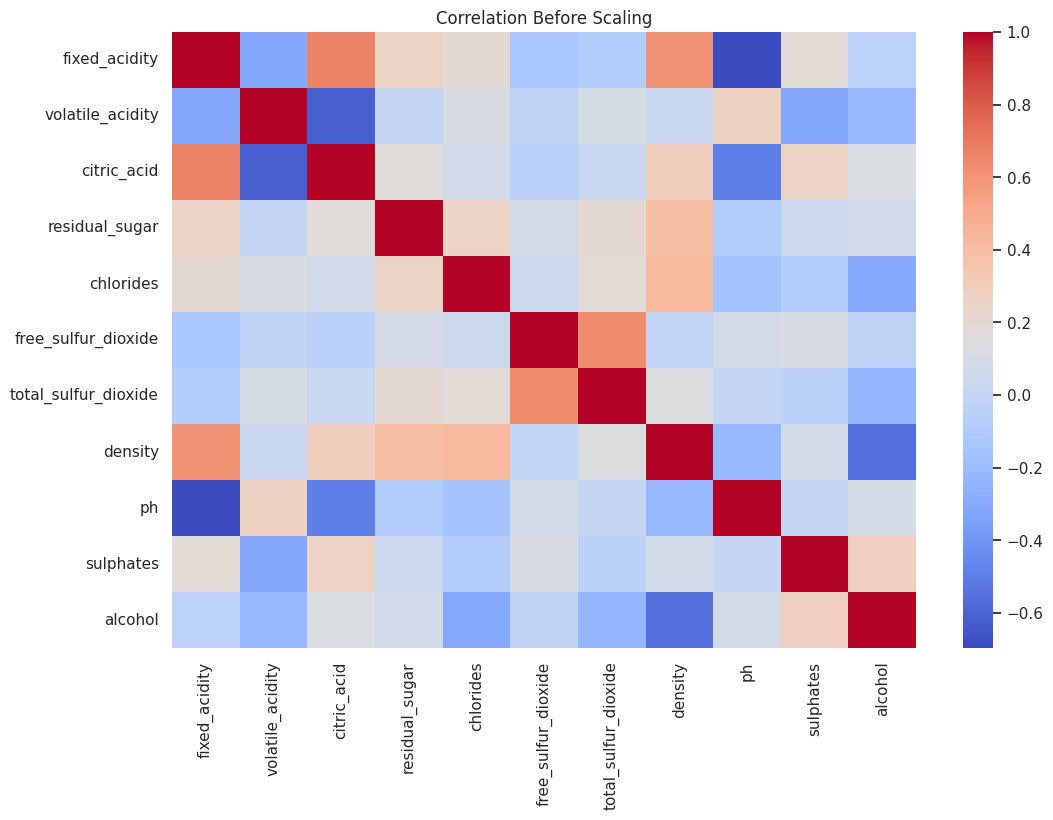

In [27]:
plt.figure(figsize=(12,8))
sns.heatmap(X_train.corr(), cmap="coolwarm")
plt.title("Correlation Before Scaling")
plt.show()

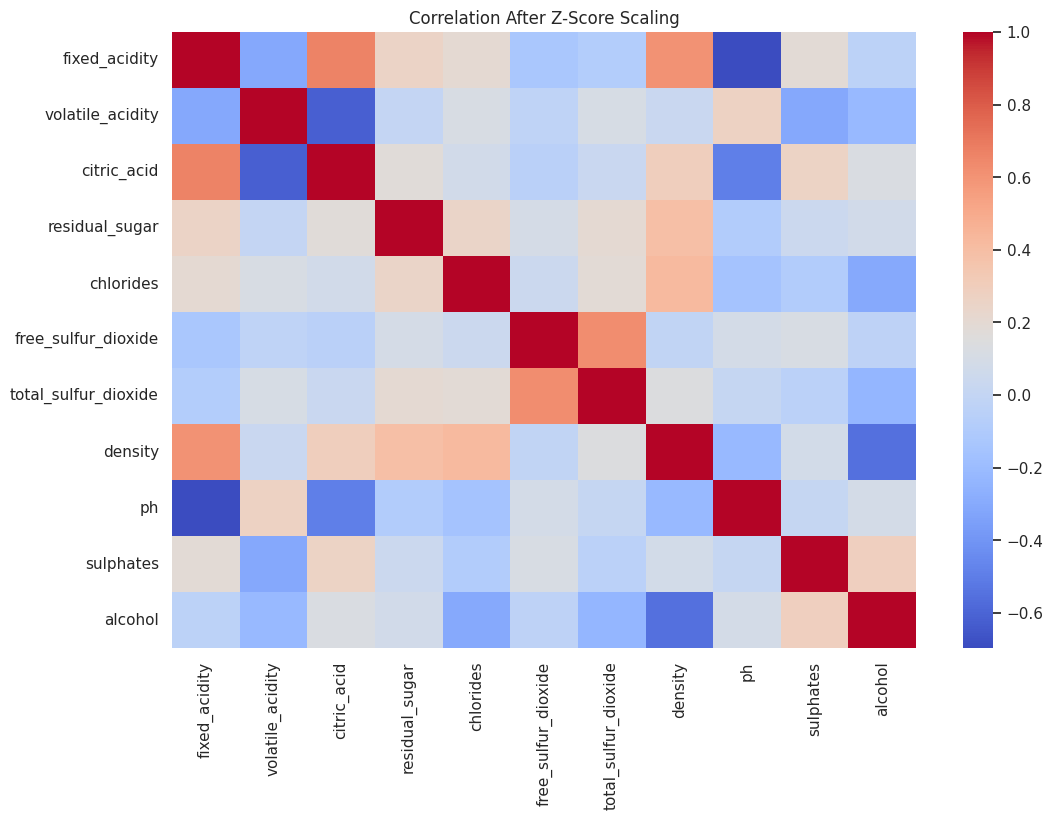

In [28]:
plt.figure(figsize=(12,8))
sns.heatmap(X_train_z.corr(), cmap="coolwarm")
plt.title("Correlation After Z-Score Scaling")
plt.show()

##Feature Selection

##Correlation-Based Feature Selection

In [29]:
# Combine training data with target for correlation
train_corr_df = X_train.copy()
train_corr_df["quality"] = y_train.values

# Compute correlation
corr_matrix = train_corr_df.corr()

# Correlation with target
target_corr = corr_matrix["quality"].sort_values(ascending=False)

print(target_corr)


quality                 1.000000
alcohol                 0.434523
sulphates               0.384698
citric_acid             0.167452
fixed_acidity           0.106016
residual_sugar         -0.017461
free_sulfur_dioxide    -0.026834
ph                     -0.055266
density                -0.181071
chlorides              -0.183257
total_sulfur_dioxide   -0.234487
volatile_acidity       -0.293284
Name: quality, dtype: float64


**Note: We select features with absolute correlation > 0.1**

In [30]:
selected_corr_features = target_corr[abs(target_corr) > 0.1].index
selected_corr_features = selected_corr_features.drop("quality")

print("Selected features (Correlation-based):")
print(selected_corr_features)


Selected features (Correlation-based):
Index(['alcohol', 'sulphates', 'citric_acid', 'fixed_acidity', 'density',
       'chlorides', 'total_sulfur_dioxide', 'volatile_acidity'],
      dtype='object')


In [31]:
X_train_corr = X_train_z[selected_corr_features]
X_test_corr = X_test_z[selected_corr_features]


Recursive Feature Elimination (RFE)

In [32]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

rfe = RFE(model, n_features_to_select=5)
rfe.fit(X_train_z, y_train)

selected_rfe_features = X.columns[rfe.support_]

print("Selected features (RFE):")
print(selected_rfe_features)


Selected features (RFE):
Index(['volatile_acidity', 'total_sulfur_dioxide', 'ph', 'sulphates',
       'alcohol'],
      dtype='object')


In [33]:
X_train_rfe = X_train_z[selected_rfe_features]
X_test_rfe = X_test_z[selected_rfe_features]


Feature Importance Bar Chart

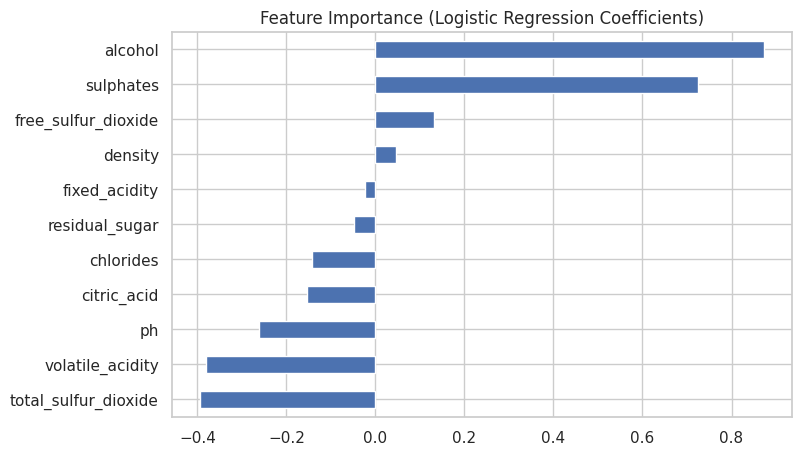

In [34]:
model.fit(X_train_z, y_train)

importance = pd.Series(model.coef_[0], index=X.columns)

importance.sort_values().plot(kind='barh')
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.show()


Accuracy Comparison (Raw vs Correlation vs RFE)

In [35]:
from sklearn.metrics import accuracy_score

# Raw scaled data
model.fit(X_train_z, y_train)
pred_raw = model.predict(X_test_z)
acc_raw = accuracy_score(y_test, pred_raw)

# Correlation-based
model.fit(X_train_corr, y_train)
pred_corr = model.predict(X_test_corr)
acc_corr = accuracy_score(y_test, pred_corr)

# RFE-based
model.fit(X_train_rfe, y_train)
pred_rfe = model.predict(X_test_rfe)
acc_rfe = accuracy_score(y_test, pred_rfe)

print("Accuracy (All Features):", acc_raw)
print("Accuracy (Correlation Selected):", acc_corr)
print("Accuracy (RFE Selected):", acc_rfe)


Accuracy (All Features): 0.7401960784313726
Accuracy (Correlation Selected): 0.7401960784313726
Accuracy (RFE Selected): 0.7156862745098039


Accuracy Comparison Plot

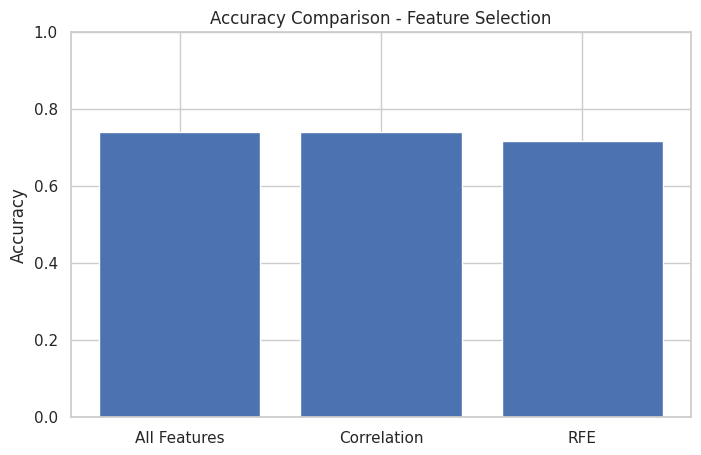

In [36]:
methods = ["All Features", "Correlation", "RFE"]
accuracies = [acc_raw, acc_corr, acc_rfe]

plt.bar(methods, accuracies)
plt.title("Accuracy Comparison - Feature Selection")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()


##Dimensionality Reduction (PCA)

Apply PCA

In [37]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(X_train_z)
X_test_pca = pca.transform(X_test_z)

print("Original shape:", X_train_z.shape)
print("After PCA shape:", X_train_pca.shape)


Original shape: (815, 11)
After PCA shape: (815, 2)


Explained Variance Plot

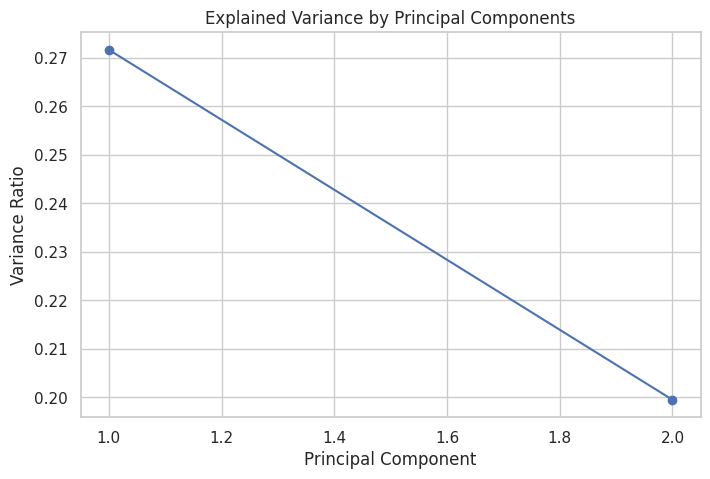

Explained Variance Ratio: [0.27170076 0.19952746]
Total Variance Preserved: 0.4712282141994779


In [38]:
explained_variance = pca.explained_variance_ratio_

plt.plot(range(1,3), explained_variance, marker='o')
plt.title("Explained Variance by Principal Components")
plt.xlabel("Principal Component")
plt.ylabel("Variance Ratio")
plt.show()

print("Explained Variance Ratio:", explained_variance)
print("Total Variance Preserved:", explained_variance.sum())


2D Scatter Plot – After PCA

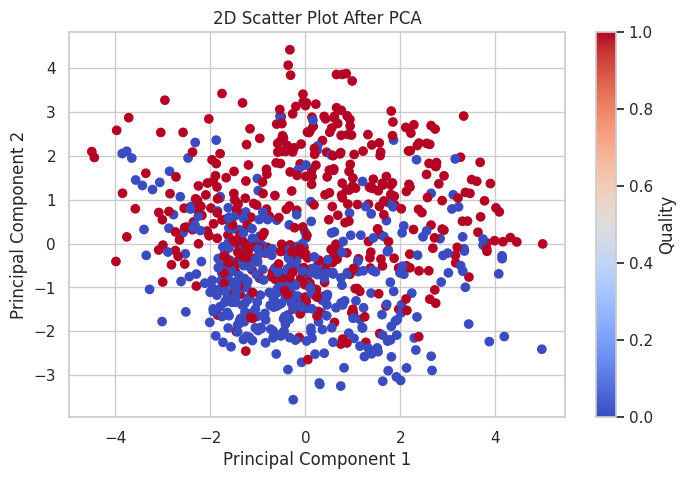

In [39]:
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train, cmap='coolwarm')
plt.title("2D Scatter Plot After PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Quality")
plt.show()


4. 2D Scatter Plot – Before PCA (Using 2 Important Features)

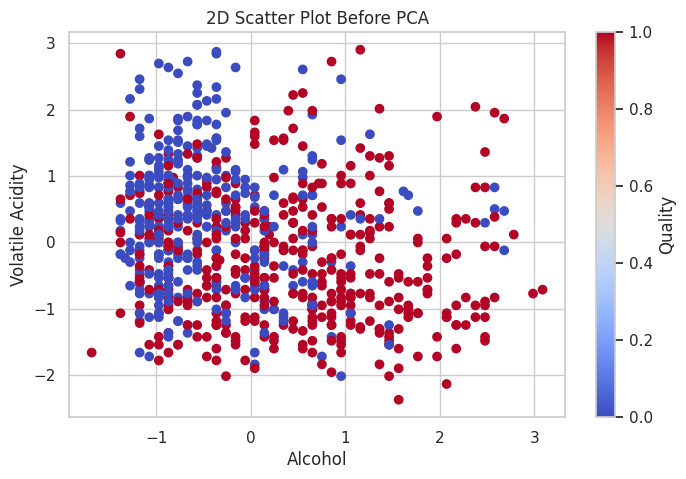

In [40]:
plt.scatter(X_train_z["alcohol"], X_train_z["volatile_acidity"],
            c=y_train, cmap='coolwarm')

plt.title("2D Scatter Plot Before PCA")
plt.xlabel("Alcohol")
plt.ylabel("Volatile Acidity")
plt.colorbar(label="Quality")
plt.show()


Model Accuracy After PCA

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter=1000)

model.fit(X_train_pca, y_train)
pred_pca = model.predict(X_test_pca)

acc_pca = accuracy_score(y_test, pred_pca)

print("Accuracy after PCA:", acc_pca)


Accuracy after PCA: 0.6764705882352942


Final Accuracy Comparison Chart

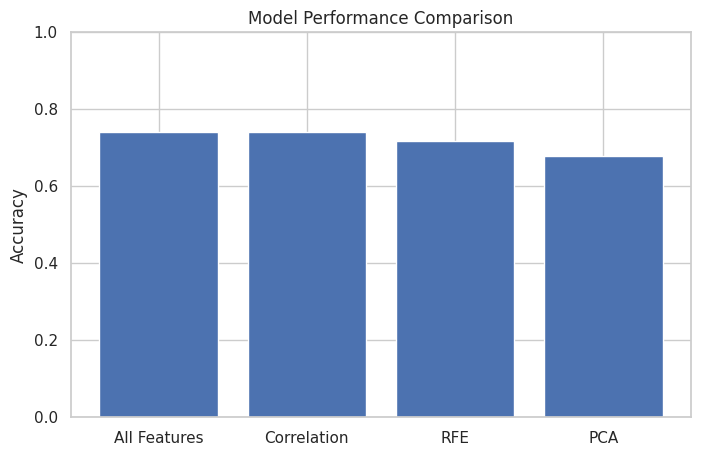

In [42]:
methods = ["All Features", "Correlation", "RFE", "PCA"]
accuracies = [acc_raw, acc_corr, acc_rfe, acc_pca]

plt.bar(methods, accuracies)
plt.title("Model Performance Comparison")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()
